<a href="https://colab.research.google.com/github/hadiabahadur13/DataVisualization/blob/main/Exploratory_Data_Analysis_and_Predictive_Modeling_of_Screen_Time_and_Mental_Wellness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---   
 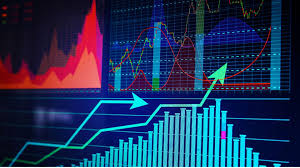

<h1 align="center">Exploratory Data Analysis and Predictive Modeling of Screen Time and Mental Wellness</h1>

---
<h3><div align="right">Researcher: Hadiya Bahadur </div></h3>    

<h1 align="center">Data Analysis and Predictive Modeling</h1>

This study focused on exploring how screen time and sleep relate to mental wellness. The dataset was cleaned and prepared by handling outliers, followed by exploratory analysis to identify key patterns. Statistical methods such as regression and ANOVA were applied to test relationships, and predictive models (Linear Regression and Random Forest) were developed to evaluate their effectiveness.
## Learning agenda of this Analysis
1. To practice essential data preparation and cleaning techniques.
2. To apply exploratory and statistical analysis methods on real-world data.
3. To build and evaluate predictive models for understanding mental wellness.

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')


Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


##**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We imported essential Python libraries for analysis. Pandas was used for data handling and manipulation, Matplotlib and Seaborn were applied for creating visualizations to better understand patterns and trends in the dataset.

# **Path to Dataset**

In [ ]:
file_path = '/content/mydrive/MyDrive/practice/ST-MW.csv'



## **Read dataset**


In [ ]:
df = pd.read_csv('/content/mydrive/MyDrive/practice/ST-MW.csv')

In [ ]:
df.head()

,user_id,age,gender,occupation,work_mode,screen_time_hours,work_screen_hours,leisure_screen_hours,sleep_hours,sleep_quality_1_5,stress_level_0_10,productivity_0_100,exercise_minutes_per_week,social_hours_per_week,mental_wellness_index_0_100,Unnamed: 15
0,U0001,33,Female,Employed,Remote,10.79,5.44,5.35,6.63,1,9.3,44.7,127,0.7,9.3,NaN
1,U0002,28,Female,Employed,In-person,7.40,0.37,7.03,8.05,3,5.7,78.0,74,2.1,56.2,NaN
2,U0003,35,Female,Employed,Hybrid,9.78,1.09,8.69,6.48,1,9.1,51.8,67,8.0,3.6,NaN
3,U0004,42,Male,Employed,Hybrid,11.13,0.56,10.57,6.89,1,10.0,37.0,0,5.7,0.0,NaN
4,U0005,28,Male,Student,Remote,13.22,4.09,9.13,5.79,1,10.0,38.5,143,10.1,0.0,NaN


#**Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) was carried out to better understand the structure and characteristics of the dataset. This included examining distributions of key variables, identifying patterns and relationships through correlation analysis, and visualizing trends using plots. Box plots were used to detect outliers, while summary statistics highlighted central tendencies and variability. The EDA provided initial insights into how factors such as screen time, sleep, and stress relate to mental wellness, and guided the selection of appropriate statistical methods and predictive models for further analysis.

###**Check dataset shape & info**

In [ ]:
df.shape       # rows, columns
df.info()      # column types + non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   user_id                      400 non-null    object 
 1   age                          400 non-null    int64  
 2   gender                       400 non-null    object 
 3   occupation                   400 non-null    object 
 4   work_mode                    400 non-null    object 
 5   screen_time_hours            400 non-null    float64
 6   work_screen_hours            400 non-null    float64
 7   leisure_screen_hours         400 non-null    float64
 8   sleep_hours                  400 non-null    float64
 9   sleep_quality_1_5            400 non-null    int64  
 10  stress_level_0_10            400 non-null    float64
 11  productivity_0_100           400 non-null    float64
 12  exercise_minutes_per_week    400 non-null    int64  
 13  social_hours_per_wee

The dataset’s shape and structure to understand its dimensions and variable types. The dataset contains 400 observations across 16 columns, including demographic, lifestyle, and mental wellness variables. Most columns are complete with no missing values, except for Unnamed: 15, which contains only null entries and can be safely removed. This step ensured clarity on the data types and readiness for further analysis.

###**Remove the extra column (Unnamed: 15)**

In [ ]:
df = df.drop(columns=['Unnamed: 15'], errors='ignore')

###**Descriptive statistics**

In [ ]:
df.describe().T   # transpose for easier reading

,count,mean,std,min,25%,50%,75%,max
age,400.0,29.777500,7.466080,16.00,24.0000,30.000,35.0000,60.00
screen_time_hours,400.0,9.024900,2.491058,1.00,7.3725,9.090,10.4950,19.17
work_screen_hours,400.0,2.183075,1.931321,0.11,0.6950,1.455,3.0125,12.04
leisure_screen_hours,400.0,6.841825,2.220896,0.89,5.4600,6.700,8.4175,13.35
sleep_hours,400.0,7.013175,0.852421,4.64,6.3975,7.030,7.6400,9.74
sleep_quality_1_5,400.0,1.397500,0.652348,1.00,1.0000,1.000,2.0000,4.00
stress_level_0_10,400.0,8.150500,2.094844,0.00,6.9000,8.800,10.0000,10.00
productivity_0_100,400.0,54.306500,15.020054,20.60,43.6000,51.750,63.0000,100.00
exercise_minutes_per_week,400.0,109.810000,70.007045,0.00,58.0000,103.000,157.0000,372.00
social_hours_per_week,400.0,7.905000,4.909632,0.00,4.5750,7.750,11.0250,23.90


The dataset consists of 400 individuals with an average age of about 30 years, ranging from 16 to 60. On average, participants reported 9 hours of daily screen time, with most of it attributed to leisure activities (≈6.8 hours) and less to work (≈2.2 hours). Sleep duration averaged about 7 hours per night, though sleep quality ratings were generally low, clustered around 1 on a 1–5 scale.

Stress levels were relatively high, averaging 8.15 out of 10, while productivity scores averaged 54 out of 100, showing moderate work performance across the sample. Participants exercised for around 110 minutes per week on average, though this varied widely, and engaged in roughly 8 hours of social activity per week.

Finally, the mental wellness index averaged only 20 out of 100, with a wide spread (SD ≈ 20), indicating that many participants scored low on wellness, though a few reached high values close to 97.

###***Variables of Interest***

screen_time_hours = overall daily screen use

sleep_hours = rest & recovery

mental_wellness_index_0_100 = overall wellness score

In [ ]:
vars_of_interest = ['screen_time_hours', 'sleep_hours', 'mental_wellness_index_0_100']

##**Box Plot for Detecting Outliers**

The box plots provided a visual summary of variable distributions and highlighted the presence of outliers.

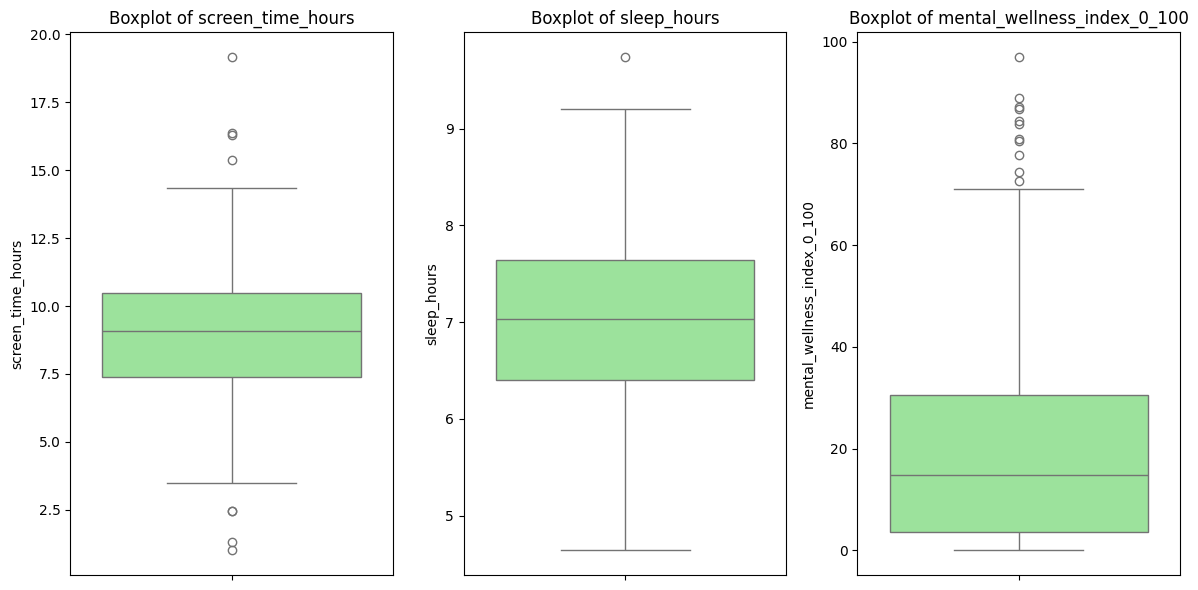

In [ ]:
plt.figure(figsize=(12,6))

for i, col in enumerate(vars_of_interest, 1):
    plt.subplot(1, 3, i)  # 1 row, 3 columns
    sns.boxplot(y=df[col], color="lightgreen")
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

For variables such as screen time hours, sleep hours, and mental wellness index, most data points fell within the interquartile range, but several individual values extended beyond the whiskers. These extreme points represent potential outliers — for example, unusually high screen time, very low sleep duration, or exceptionally high wellness scores compared to the majority of participants. The detection of such outliers is important, as they may represent data entry errors, unique cases, or individuals with extreme behaviors that could disproportionately influence statistical results and model performance.

#**Removing Outliers**

Outliers detected in variables such as screen time, sleep hours, and mental wellness were removed using the interquartile range method to ensure cleaner distributions and more reliable analysis results.

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only non-outliers
    cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned


In [ ]:
variables = ['screen_time_hours', 'sleep_hours', 'mental_wellness_index_0_100']

df_clean = df.copy()
for col in variables:
    df_clean = remove_outliers_iqr(df_clean, col)

print("Original shape:", df.shape)
print("After removing outliers:", df_clean.shape)


Original shape: (400, 15)
After removing outliers: (383, 15)


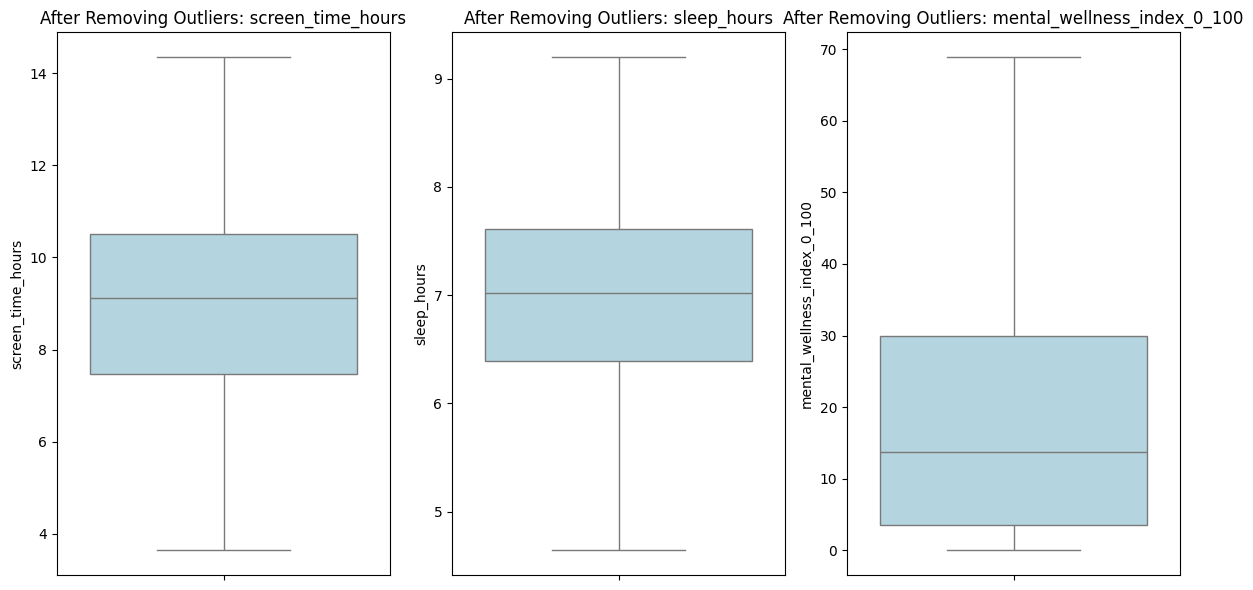

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
for i, col in enumerate(variables, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df_clean[col], color="lightblue")
    plt.title(f'After Removing Outliers: {col}')

plt.tight_layout()
plt.show()

After removing the outliers identified in the box plots, the dataset became more consistent and representative of the majority of participants. Extreme values that previously skewed the distribution of variables such as screen time, sleep hours, and mental wellness index were eliminated, resulting in smoother distributions and more reliable central tendencies. This step reduces the risk of distortion in statistical tests and predictive models, allowing for clearer insights into the general patterns of behavior and wellness in the population. However, it also means that some unique cases have been excluded, so findings now reflect typical trends rather than extreme scenarios.

#**Correlation Analysis**

To explore the relationships between key variables, a correlation analysis was performed. This helped identify how factors such as screen time, sleep, and mental wellness are interlinked, providing insights into both positive and negative associations within the dataset.

In [ ]:
corr = df[vars_of_interest].corr()

###***Heatmap***

A correlation heatmap was created to visually represent the strength of relationships among variables. The color gradients made it easier to identify strong positive and negative correlations, such as the negative link between screen time and mental wellness, and the positive association between sleep duration and wellness. This visualization provided a clear overview of interdependencies across the dataset.

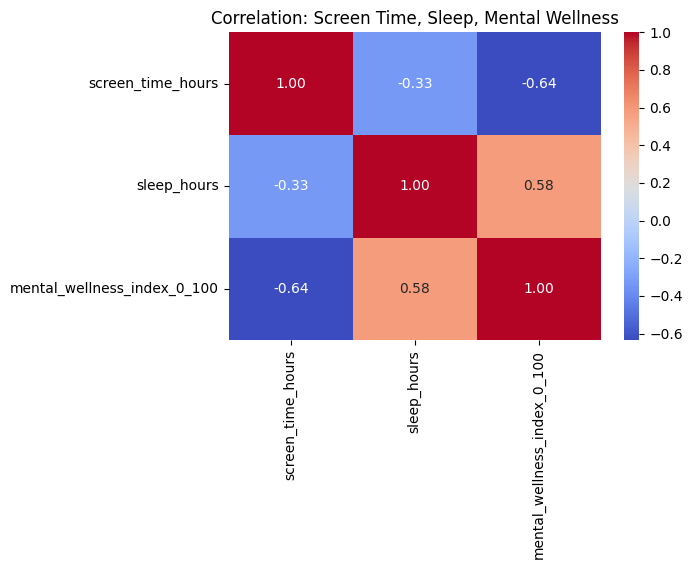

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Screen Time, Sleep, Mental Wellness")
plt.show()

The heatmap shows three key insights:

1. Screen time vs. mental wellness: Strong negative correlation (-0.64). Higher screen time is linked to poorer mental wellness.

2. Sleep vs. mental wellness: Moderate positive correlation (0.58). More sleep is associated with better mental wellness.

3. Screen time vs. sleep: Weak-to-moderate negative correlation (-0.33). More screen time tends to reduce sleep hours.

Overall, higher screen time appears harmful for both sleep and mental wellness, while sleep supports better mental health.

#**Regression Analysis**

To further investigate the impact of lifestyle factors on mental wellness, a regression analysis was performed. This approach allowed us to quantify how variables such as screen time and sleep contribute to predicting mental wellness outcomes.

Dependent (Y): mental_wellness_index_0_100

Independent (X): screen_time_hours, sleep_hours


In [ ]:
import statsmodels.api as sm

# Select predictors (independent variables)
X = df[['screen_time_hours', 'sleep_hours']]

# Dependent variable
y = df['mental_wellness_index_0_100']

# Add constant for intercept
X = sm.add_constant(X)

# Build regression model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:     mental_wellness_index_0_100   R-squared:                       0.558
Model:                                     OLS   Adj. R-squared:                  0.556
Method:                          Least Squares   F-statistic:                     250.9
Date:                         Thu, 25 Sep 2025   Prob (F-statistic):           3.60e-71
Time:                                 08:54:54   Log-Likelihood:                -1609.4
No. Observations:                          400   AIC:                             3225.
Df Residuals:                              397   BIC:                             3237.
Df Model:                                    2                                         
Covariance Type:                     nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

The regression analysis shows that:

* Model fit: R² = 0.558 → The model explains ~56% of the variation in mental wellness, which is a moderate-to-strong fit. The overall model is highly significant (F-statistic p < 0.001).
* Screen time: Coefficient = -4.08 (p < 0.001) → Each additional hour of screen time is associated with about a 4-point decrease in the mental wellness index, holding sleep constant.
* Sleep hours: Coefficient = +9.94 (p < 0.001) → Each extra hour of sleep is linked to nearly a 10-point increase in the mental wellness index, controlling for screen time.
* Constant: Not significant (p = 0.083), so baseline (when predictors = 0) isn’t meaningful here.

Overall more screen time significantly harms mental wellness, while more sleep significantly improves it. Sleep has a stronger positive effect than the negative effect of screen time, but both are substantial.

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

### ***Independent variables***

In [ ]:
X = df[['screen_time_hours', 'sleep_hours']]
y = df['mental_wellness_index_0_100']


### Add constant

In [ ]:
X = sm.add_constant(X)


### Fit regression model

In [ ]:
model = smf.ols('mental_wellness_index_0_100 ~ screen_time_hours + sleep_hours', data=df).fit()


# **ANOVA table**


An Analysis of Variance (ANOVA) test was conducted to evaluate whether the predictor variables significantly contribute to variations in mental wellness. This method provided statistical evidence on the strength of associations and the overall explanatory power of the regression model.

In [ ]:
anova_results = anova_lm(model, typ=2)  # Type II ANOVA
print(anova_results)

                         sum_sq     df           F        PR(>F)
screen_time_hours  36605.358709    1.0  198.596992  7.420908e-37
sleep_hours        25494.356464    1.0  138.315883  1.330072e-27
Residual           73174.962391  397.0         NaN           NaN


From ANOVA table it can be found that:

* Screen time hours: F = 198.60, p < 0.001 → Strongly significant. Screen time explains a large portion of the variance in mental wellness.
* Sleep hours: F = 138.32, p < 0.001 → Also strongly significant, though its effect size is slightly smaller than screen time.
* Residuals: Represent unexplained variance after accounting for screen time and sleep.

Overall both screen time and sleep hours are highly significant predictors of mental wellness. Screen time explains slightly more variance than sleep, but both contribute meaningfully to the model.

#**Training and Testing Two Analytical Models**

To evaluate predictive performance, the dataset was split into training and testing sets, and two analytical models were developed: Linear Regression and Random Forest Regressor. The models were trained on the training data and tested on unseen data to assess their accuracy and reliability in predicting mental wellness outcomes.

###***Choose Target and Features***

In [ ]:
features = ['screen_time_hours', 'sleep_hours', 'stress_level_0_10',
            'exercise_minutes_per_week', 'social_hours_per_week']
target = 'mental_wellness_index_0_100'


###***Train-Test Split***

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean[features]
y = df_clean[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

###***Model 1 — Linear Regression***

Linear regression is a statistical method that analyzes and models the relationship between a dependent variable and one or more independent variables by fitting a straight line to the data.

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print("Linear Regression:")
print("R²:", r2_score(y_test, y_pred_lr))
print("RMSE:", rmse)

Linear Regression:
R²: 0.8432281984011254
RMSE: 7.370896756621887


The outcomes of Linear Regression shows:

*   R² = 0.843 → Explains about 84% of the variance in mental wellness.
*   RMSE = 7.37 → Average prediction error is around 7 points on the wellness index

###***Model 2 — Random Forest Regressor***

A Random Forest Regressor is an ensemble machine learning algorithm used for regression tasks, meaning it predicts continuous numerical values.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest:")
print("R²:", r2_score(y_test, y_pred_rf))
print("RMSE:", rmse_rf)

Random Forest:
R²: 0.804018585066239
RMSE: 8.241263457542377


The outcomes of Random Forest shows:

*   R² = 0.804 → Explains about 80% of the variance.
*   RMSE = 8.24 → Prediction error is slightly larger than linear regression.

#**Comparison Table**

In [ ]:
import pandas as pd

results = {
    "Model": ["Linear Regression", "Random Forest"],
    "R²": [0.8432281984011254, 0.804018585066239],
    "RMSE": [7.370896756621887, 8.241263457542377]
}

results_df = pd.DataFrame(results)
print(results_df)

               Model        R²      RMSE
0  Linear Regression  0.843228  7.370897
1      Random Forest  0.804019  8.241263


The linear regression model outperforms the random forest here, with higher explanatory power (R²) and lower prediction error (RMSE). This suggests the relationship between screen time, sleep, and mental wellness is largely linear and doesn’t benefit much from the non-linear flexibility of Random Forest.
